### GATHER

In [7]:
# Import libs used in the project
import tweepy
import pandas as pd
import requests
import os
import time
import json
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Sets the length of the characters to be displayed in each pandas column - Was set up to see the full text 
pd.options.display.max_colwidth = 10000

In [8]:
# read into twitter-archive-enhanced.csv
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')

# Create a copy of original data set for cleaning
twitter_archive=twitter_archive.copy()

In [9]:
#set the url of the file and record response with requests lib
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

In [10]:
#Write the file into root folder
with open (os.path.join(url.split('/')[-1]), mode= 'wb') as file:
    file.write(response.content) 

In [11]:
#read into image-predictions.tsv
image_predictions=pd.read_csv('image-predictions.tsv',sep='\t')

# Create a copy of original data set for cleaning
image_predictions=image_predictions.copy()

In [12]:
# Code was intentionally block commented in order to not to run it second time as it takes 30 min

# Set up the connection with tweeter API using specified credentials.
"""consumer_key = 'consumer_key'
consumer_secret = 'consumer_secret'
access_token = 'access_token'
access_secret = 'access_secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)"""


"consumer_key = 'consumer_key'\nconsumer_secret = 'consumer_secret'\naccess_token = 'access_token'\naccess_secret = 'access_secret'\n\nauth = tweepy.OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth)"

In [13]:
# Code was intentionally block commented in order to not to run it second time as it takes 30 min to run

### Gets twitter data
"""data = []

for i in twitter_archive['tweet_id']:
    start = time.time()
    try:
        t=api.get_status(i,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)._json
        data.append(t)
    except:
        pass
    end = time.time()
    print(end - start)"""

"data = []\n\nfor i in twitter_archive['tweet_id']:\n    start = time.time()\n    try:\n        t=api.get_status(i,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)._json\n        data.append(t)\n    except:\n        pass\n    end = time.time()\n    print(end - start)"

In [14]:
# Code was intentionally block commented in order to not to run it second time as it takes 30 min to run

#Write the collected data line by line into txt file
"""with open('tweet_json.txt', 'a') as outfile:
    for i in data:
        json.dump(i, outfile)
        outfile.write('\n')"""

"with open('tweet_json.txt', 'a') as outfile:\n    for i in data:\n        json.dump(i, outfile)\n        outfile.write('\n')"

In [15]:
# Read into collected tweeter API data file
twitter_API=pd.read_json('tweet_json.txt', lines=True)

# Create a copy of original data set for cleaning
twitter_API=twitter_API.copy()

## Assessing Data 

### Twitter_archive

### Visual

In [16]:
# Take a look at first 5 rows in df
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [17]:
# Take a look at last 5 rows in df
twitter_archive.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


- Lots of NaNs in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp	
- Lots of Nones in name, doggo, floofer, pupper, puppo
- doggo, floofer, pupper, puppo should go in 1 column called alt_name

#### Programmatic

In [18]:
# Take a look at the data fields and the number counts
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

- timestamp and retweeted_status_timestamp should be datetime object
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp have way less non-nulls as the whole df. Consider dropping.

In [19]:
# Take a look at the value counts for in_reply_to_user_id variable
twitter_archive.in_reply_to_user_id.value_counts()

4.196984e+09    47
2.195506e+07     2
7.305050e+17     1
2.916630e+07     1
3.105441e+09     1
2.918590e+08     1
2.792810e+08     1
2.319108e+09     1
1.806710e+08     1
3.058208e+07     1
2.625958e+07     1
1.943518e+08     1
3.589728e+08     1
8.405479e+17     1
2.894131e+09     1
2.143566e+07     1
2.281182e+09     1
1.648776e+07     1
4.717297e+09     1
2.878549e+07     1
1.582854e+09     1
4.670367e+08     1
4.738443e+07     1
1.361572e+07     1
1.584641e+07     1
2.068372e+07     1
1.637468e+07     1
1.185634e+07     1
1.198989e+09     1
1.132119e+08     1
7.759620e+07     1
Name: in_reply_to_user_id, dtype: int64

- seems that user with id 4.196984e+09 has 47 in_reply_to_user_id

In [20]:
# Take a look at the value counts for tweet_id variable
twitter_archive.tweet_id.value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
763956972077010945    1
870308999962521604    1
720775346191278080    1
785927819176054784    1
783347506784731136    1
775733305207554048    1
834209720923721728    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
6909388994772213

In [21]:
# Check if tweet_id has duplicates
twitter_archive['tweet_id'].duplicated().value_counts()

False    2356
Name: tweet_id, dtype: int64

- Seems that there is no duplicated ID's

In [22]:
# Take a look at the value counts for rating_denominator variable and sort the index ascending
twitter_archive.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [23]:
# Take a look at the value counts for rating_numerator variable and sort the index ascending
twitter_archive.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

- Would need to create real_rating column which will calculate rating_numerator/rating_denomerator

In [24]:
# Take a look at the value counts for name variable and sort the index ascending
twitter_archive.name.value_counts

<bound method IndexOpsMixin.value_counts of 0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326       quite
2327           a
2328        None
2329        None
2330        None
2331        None
2332        None
2333          an
2334           a
2335          an
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345         the
2346         the
2347           a
2348           a
2349          an
2350           a
2351

In [25]:
# Chech how many None's name variable has
pd.value_counts(twitter_archive.name=='None')

False    1611
True      745
Name: name, dtype: int64

- name variable has only 957 variations of names, 745 from them are None's
- Some values are not representing names: 'a', 'actually', 'all', 'an', 'by', 'getting', 'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very', 'my', and 'his'

In [26]:
# Chech how many doggo's are in doggo variable 
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [27]:
# Chech how many floofer's are in floofer variable 
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [28]:
# Chech how many pupper's are in pupper variable
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [29]:
# Chech how many puppo's are in puppo variable
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [30]:
# Count total dog_stages
twitter_archive.doggo.value_counts()['doggo']+twitter_archive.floofer.value_counts()['floofer']+twitter_archive.pupper.value_counts()['pupper']+twitter_archive.puppo.value_counts()['puppo']

394

- doggo, floofer, pupper, puppo have 394 not "None" values 

#### Quality
- Lots of NaNs in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp. Also, they have way less non-nulls as the whole df. Consider dropping.
- Lots of Nones in name, doggo, floofer, pupper, puppo
- Timestamp and retweeted_status_timestamp should be datetime object
- Name values need to be checked, the missing ones should be replaced to none
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id  has to be int64
- Would need to create real_rating column which will calculate rating_numerator/rating_denomerator

#### Tidiness
- doggo, floofer, pupper, puppo should go in 1 column called dog_stage

### Image_predictions
### Visual

In [31]:
# Take a look at first 5 rows in df
image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [32]:
# Take a look at last 5 rows in df
image_predictions.tail(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


### Programmatic

In [33]:
# Look at image_predictions info
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [34]:
# Check counts for img_num
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

##### Quality
- Seems like there is no data quality and tidiness isues seen in the data 
- I would probably need to merge the twitter data with image predictions by id and leave only p1-3 conf and dog

##### Tidiness
- Need to place p1-3 conf levels into one column called conf_level and p1-3 to one column called dog_type

## twitter_API

### Visual

In [35]:
# Take a look at first 5 rows in df
twitter_API.head(5)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",38995,False,NaN,892420643555336193,892420643555336192,...,NaN,NaN,NaN,8653,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'location': '𝓶𝓮𝓻𝓬𝓱 ↴ DM YOUR DOGS', 'description': 'Your Only Source for Professional Dog Ratings STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs | MOBILE APP: @GoodDogsGame Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 6304166, 'friends_count': 103, 'listed_count': 4139, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 132819, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 6803, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1515037507', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}"
1,NaN,NaN,2017-08-01 00:17:27,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/aQFSeaCu9L', 'expanded_url': 'https://twitter.com/i/web/status/892177421306343426', 'display_url': 'twitter.com/i/web/status/8…', 'indices': [117, 140]}]}",NaN,33390,False,NaN,892177421306343426,892177421306343424,...,NaN,NaN,NaN,

In [36]:
# Take a look at last 5 rows in df
twitter_API.tail(5)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
2342,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666049244999131136, 'id_str': '666049244999131136', 'indices': [97, 120], 'media_url': 'http://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg', 'url': 'https://t.co/4B7cOc1EDq', 'display_url': 'pic.twitter.com/4B7cOc1EDq', 'expanded_url': 'https://twitter.com/dog_rates/status/666049248165822465/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}, 'large': {'w': 768, 'h': 1024, 'resize': 'fit'}, 'medium': {'w': 768, 'h': 1024, 'resize': 'fit'}}}]}","{'media': [{'id': 666049244999131136, 'id_str': '666049244999131136', 'indices': [97, 120], 'media_url': 'http://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg', 'url': 'https://t.co/4B7cOc1EDq', 'display_url': 'pic.twitter.com/4B7cOc1EDq', 'expanded_url': 'https://twitter.com/dog_rates/status/666049248165822465/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}, 'large': {'w': 768, 'h': 1024, 'resize': 'fit'}, 'medium': {'w': 768, 'h': 1024, 'resize': 'fit'}}}]}",109,False,NaN,666049248165822465,666049248165822464,...,NaN,NaN,NaN,40,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'location': '𝓶𝓮𝓻𝓬𝓱 ↴ DM YOUR DOGS', 'description': 'Your Only Source for Professional Dog Ratings STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs | MOBILE APP: @GoodDogsGame Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 6304555, 'friends_count': 103, 'listed_count': 4043, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 132819, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 6803, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1515037507', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}"
2343,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666044217047650304, 'id_str': '666044217047650304', 'indices': [114, 137], 'media_url': 'http://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg', 'url': 

### Programmatic

In [37]:
# look at twitter_API info
twitter_API.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2347 entries, 0 to 2346
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2347 non-null datetime64[ns]
entities                         2347 non-null object
extended_entities                1825 non-null object
favorite_count                   2347 non-null int64
favorited                        2347 non-null bool
geo                              0 non-null float64
id                               2347 non-null int64
id_str                           2347 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  2347 non-null bool
lang                             2347 no

##### Quality
- Max number of variables is 2347 which is less then 2356
- Lots of NaNs
- Will use only retweet_count, favorite_count, created_at and merge to twitter_archive 
- rename id to tweet_id

## Assessing Data - Conclusion

### Quality

##### ` twitter_archive` table
- Lots of NaNs in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp. Also, they have way less non-nulls as the whole df. Consider dropping.
- Lots of Nones in name, doggo, floofer, pupper, puppo
- Timestamp and retweeted_status_timestamp should be datetime object
- Name values need to be checked, the missing ones should be replaced to None, 'my' should be replaced by Zoey, 'his' should be replaced by Quizno, all other values to 'None'
- retweeted_status_id has to be int64
- Would need to create real_rating column which will calculate rating_numerator/rating_denomerator
- Drop all columns with insufficient data

- all other values to 'None'

##### ` image_predictions` table
- dog value column should be lowercase

##### ` twitter_API` table
- Max number of variables is 2347 which is less then 2356
- Lots of NaNs
- Will use only retweet_count, favorite_count, created_at and merge to twitter_archive
- rename id to tweet_id

##### Combined ` twitter_archive`  and ` twitter_API` table

- 2356 and 2347 record in two tables
- combine ` twitter_archive` and ` twitter_API` tweet_id, favourite_count, retweet_count 

### Tidiness
##### ` twitter_archive` table
- doggo, floofer, pupper, puppo should go in 1 column called dog_stage

##### ` image_predictions` table
- Need to place p1-3 conf levels into one column called conf_level and p1-3 to one column called dog_type

### Cleaning

### Tidiness

##### ` twitter_archive` table
- doggo, floofer, pupper, puppo should go in 1 column called dog_stage

#### Define

- Use melt or lambda x and text extract to perform the operation. Need to drop NaN 

#### Code

In [38]:
# Using labda x stack all dog stages in one column dog_stage and drop NA
twitter_archive['dog_stage']=twitter_archive.apply(lambda x: ','.join(x.iloc[13:].dropna()), axis=1)

In [39]:
# Extract only words doggo floofer pupper puppo with str extract
twitter_archive['dog_stage']=twitter_archive['dog_stage'].str.extract('(doggo|floofer|pupper|puppo)', expand=True)

In [40]:
# Drop old 'doggo','floofer','pupper','puppo' columns
twitter_archive.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

In [41]:
# Fill NA with Nones
twitter_archive['dog_stage']=twitter_archive['dog_stage'].fillna('None')

#### Test

In [42]:
#Check first 5 entries
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None


In [43]:
# Check value count frequency
twitter_archive['dog_stage'].value_counts()

None       1976
pupper      245
doggo        97
puppo        29
floofer       9
Name: dog_stage, dtype: int64

In [44]:
# Check info
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     2356 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


##### ` image_predictions` table
- Need to place p1-3 conf levels into one column called conf_level and p1-3 to one column called dog_type

#### Define

- Bring p1-3 conf levels into one column called Class and p1-3_conf to one column called Conf and p1-3_dog to one column called Dog. Probably using melt, reshape or stack. Used lreshape.

#### Code

In [45]:
# Create dict with names of columns to be subsetted into three separate columns
d = {'class':['p1','p2','p3'], 'dog':["p1_dog","p2_dog","p3_dog"]}

# Apply lreshape to stack values accordingly
image_predictions_long = pd.lreshape(image_predictions,d)

# Rename p1-3_conf to p1-3 to show as a tag
image_predictions_long.rename(columns={'p1_conf' : 'p1', 'p2_conf': 'p2', 'p3_conf':'p3'},inplace=True)

In [46]:
# Melt p1-3_conf to p1-3 to show as a tags in one column and probabilities in another
image_predictions_long = pd.melt(image_predictions_long, id_vars=['img_num','jpg_url','tweet_id','class','dog'],
                           var_name='conf_type', value_name= 'conf')

#### Test

In [47]:
#Take a look at the first line in df
image_predictions_long.head(1)

,img_num,jpg_url,tweet_id,class,dog,conf_type,conf
0,1,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,666020888022790149,Welsh_springer_spaniel,True,p1,0.465074


In [48]:
# Check if melt went well by looking at groups of id confidences
image_predictions_long.groupby(['tweet_id','conf_type']).count()

img_num  jpg_url  class  dog  conf
tweet_id           conf_type                                    
666020888022790149 p1               3        3      3    3     3
                   p2               3        3      3    3     3
                   p3               3        3      3    3     3
666029285002620928 p1               3        3      3    3     3
                   p2               3        3      3    3     3
                   p3               3        3      3    3     3
666033412701032449 p1               3        3      3    3     3
                   p2               3        3      3    3     3
                   p3               3        3      3    3     3
666044226329800704 p1               3        3      3    3     3
                   p2               3        3      3    3     3
                   p3               3        3      3    3     3
666049248165822465 p1               3        3      3    3     3
                   p2               3        3      3    3     3
                   p3               3        3      3    3     3
666050758794694657 p1               3        3      3    3     3
                   p2               3        3      3    3     3
                   p3               3        3      3    3     3
666051853826850816 p1               3        3      3    3     3
                   p2               3        3      3    3     3
                   p3               3        3      3    3     3
666055525042405380 p1               3        3      3    3     3
                   p2               3        3      3    3     3
                   p3               3        3      3    3     3
666057090499244032 p1               3        3      3    3     3
                   p2               3        3      3    3     3
                   p3               3        3      3    3     3
666058600524156928 p1               3        3      3    3     3
                   p2               3        3      3    3     3
                   p3               3        3      3    3     3
...                               ...      ...    ...  ...   ...
890240255349198849 p1               3        3      3    3     3
                   p2               3        3      3    3     3
                   p3               3        3      3    3     3
890609185150312448 p1               3        3      3    3     3
                   p2               3        3      3    3     3
                   p3               3        3      3    3     3
890729181411237888 p1               3        3      3    3     3
                   p2               3        3      3    3     3
                   p3               3        3      3    3     3
890971913173991426 p1               3        3      3    3     3
                   p2               3        3      3    3     3
                   p3               3        3      3    3     3
891087950875897856 p1               3        3      3    3     3
                   p2               3        3      3    3     3
                   p3               3        3      3    3     3
891327558926688256 p1               3        3      3    3     3
                   p2               3        3      3    3     3
                   p3               3        3      3    3     3
891689557279858688 p1               3        3      3    3     3
                   p2               3        3      3    3     3
                   p3               3        3      3    3     3
891815181378084864 p1               3        3      3    3     3
                   p2               3        3      3    3     3
                   p3               3        3      3    3     3
892177421306343426 p1               3        3      3    3     3
                   p2               3        3      3    3     3
                   p3               3        3      3    3     3
892420643555336193 p1               3        3      3    3     3
                   p2               3        3      3    3     3


- This wont work as we have times 3 values per each record and we expect to have one
- SOLUTION - subgroup by tweet_id, get each true p1-3 values to end only with 3 entries per tweet_id

### Code

In [49]:
#Create 3 different dfs by subsetting corresponding p-levels
df1=image_predictions_long.groupby('tweet_id').nth(0).reset_index(drop=False)
df2=image_predictions_long.groupby('tweet_id').nth(4).reset_index(drop=False)
df3=image_predictions_long.groupby('tweet_id').nth(8).reset_index(drop=False)

In [50]:
#Concat 3 created dfs
image_predictions_long =  pd.concat([df1, df2, df3])
#Change type of 'conf' to numeric
image_predictions_long['conf']=pd.to_numeric(image_predictions_long['conf'] )

### Test

In [51]:
#Take a look at the first line in df
image_predictions_long.head(1)

,tweet_id,class,conf,conf_type,dog,img_num,jpg_url
0,666020888022790149,Welsh_springer_spaniel,0.465074,p1,True,1,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg


In [52]:
image_predictions_long.groupby(['tweet_id','conf_type']).count()

class  conf  dog  img_num  jpg_url
tweet_id           conf_type                                    
666020888022790149 p1             1     1    1        1        1
                   p2             1     1    1        1        1
                   p3             1     1    1        1        1
666029285002620928 p1             1     1    1        1        1
                   p2             1     1    1        1        1
                   p3             1     1    1        1        1
666033412701032449 p1             1     1    1        1        1
                   p2             1     1    1        1        1
                   p3             1     1    1        1        1
666044226329800704 p1             1     1    1        1        1
                   p2             1     1    1        1        1
                   p3             1     1    1        1        1
666049248165822465 p1             1     1    1        1        1
                   p2             1     1    1        1        1
                   p3             1     1    1        1        1
666050758794694657 p1             1     1    1        1        1
                   p2             1     1    1        1        1
                   p3             1     1    1        1        1
666051853826850816 p1             1     1    1        1        1
                   p2             1     1    1        1        1
                   p3             1     1    1        1        1
666055525042405380 p1             1     1    1        1        1
                   p2             1     1    1        1        1
                   p3             1     1    1        1        1
666057090499244032 p1             1     1    1        1        1
                   p2             1     1    1        1        1
                   p3             1     1    1        1        1
666058600524156928 p1             1     1    1        1        1
                   p2             1     1    1        1        1
                   p3             1     1    1        1        1
...                             ...   ...  ...      ...      ...
890240255349198849 p1             1     1    1        1        1
                   p2             1     1    1        1        1
                   p3             1     1    1        1        1
890609185150312448 p1             1     1    1        1        1
                   p2             1     1    1        1        1
                   p3             1     1    1        1        1
890729181411237888 p1             1     1    1        1        1
                   p2             1     1    1        1        1
                   p3             1     1    1        1        1
890971913173991426 p1             1     1    1        1        1
                   p2             1     1    1        1        1
                   p3             1     1    1        1        1
891087950875897856 p1             1     1    1        1        1
                   p2             1     1    1        1        1
                   p3             1     1    1        1        1
891327558926688256 p1             1     1    1        1        1
                   p2             1     1    1        1        1
                   p3             1     1    1        1        1
891689557279858688 p1             1     1    1        1        1
                   p2             1     1    1        1        1
                   p3             1     1    1        1        1
891815181378084864 p1             1     1    1        1        1
                   p2             1     1    1        1        1
                   p3             1     1    1        1        1
892177421306343426 p1             1     1    1        1        1
                   p2             1     1    1        1        1
                   p3             1     1    1        1        1
892420643555336193 p1             1     1    1        1        1
                   p2             1     1    1        1        1


# Quality

##### Combined ` twitter_archive`  , ` twitter_API`

- 2356 and 2347 record in two tables
- combine ` twitter_archive` and ` twitter_API` tweet_id, favourite_count, retweet_count, created_at


#### Define

- I have missing data in `twitter_API` (2347 out of 2356). Seems like those ID's are no longer exist or have been duplicated. Since I can't get this information, I will have to reduce my ` twitter_archive` by the number of `twitter_API` data to make data consistent. Will use rename first and then merge by tweet_id to perform this operation.

#### Code

In [53]:
# rename 'id' column to 'tweet_id'
twitter_API.rename(columns={'id' : 'tweet_id'},inplace=True)

# Create a list of column names to be used
col_list = ['tweet_id','favorite_count','retweet_count']

# make a subset of columns from twitter_API, using items from specified list and rewriting twitter_API df
twitter_API=twitter_API[col_list]

In [54]:
#  merge twitter_archive and twitter_API with left join 
twitter_archive_merged=twitter_archive.merge(twitter_API, left_on='tweet_id', right_on='tweet_id', how='right')

#### Test

In [55]:
# Check first 5 entries
twitter_archive_merged.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,38995,8653
1,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,38995,8653
2,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,33390,6355
3,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,33390,6355
4,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,25168,4220


In [56]:
# Check info
twitter_archive_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2347 entries, 0 to 2346
Data columns (total 16 columns):
tweet_id                      2347 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2347 non-null object
source                        2347 non-null object
text                          2347 non-null object
retweeted_status_id           170 non-null float64
retweeted_status_user_id      170 non-null float64
retweeted_status_timestamp    170 non-null object
expanded_urls                 2288 non-null object
rating_numerator              2347 non-null int64
rating_denominator            2347 non-null int64
name                          2347 non-null object
dog_stage                     2347 non-null object
favorite_count                2347 non-null int64
retweet_count                 2347 non-null int64
dtypes: float64(4), int64(5), object(7)
memory usage: 311.7+ KB


### Combined ` twitter_archive`  , ` twitter_API` = `twitter_archive_merged`

- clean columns that are not needed 

#### Define
- Won't use in_reply_to_status_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls - use drop

#### Code

In [57]:
# drop 'in_reply_to_user_id','in_reply_to_status_id', 'retweeted_status_id', 'retweeted_status_user_id', 
# 'retweeted_status_timestamp', 'expanded_urls'

twitter_archive_merged=twitter_archive_merged.drop(['in_reply_to_user_id','in_reply_to_status_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis=1)

#### Test

In [58]:
# Check info
twitter_archive_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2347 entries, 0 to 2346
Data columns (total 10 columns):
tweet_id              2347 non-null int64
timestamp             2347 non-null object
source                2347 non-null object
text                  2347 non-null object
rating_numerator      2347 non-null int64
rating_denominator    2347 non-null int64
name                  2347 non-null object
dog_stage             2347 non-null object
favorite_count        2347 non-null int64
retweet_count         2347 non-null int64
dtypes: int64(5), object(5)
memory usage: 201.7+ KB


##### `twitter_archive_merged`
- timestamp should be datetime object

#### Define 
- Using pd.to_datetime convert the field

#### Code

In [59]:
# change timestamp to datetime object
twitter_archive_merged.timestamp=pd.to_datetime(twitter_archive_merged.timestamp)

#### Test

In [60]:
#Check info
twitter_archive_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2347 entries, 0 to 2346
Data columns (total 10 columns):
tweet_id              2347 non-null int64
timestamp             2347 non-null datetime64[ns]
source                2347 non-null object
text                  2347 non-null object
rating_numerator      2347 non-null int64
rating_denominator    2347 non-null int64
name                  2347 non-null object
dog_stage             2347 non-null object
favorite_count        2347 non-null int64
retweet_count         2347 non-null int64
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 201.7+ KB


#### `twitter_archive_merged`
- Would need to create real_rating column which will calculate rating_numerator/rating_denominator

#### Define
- Create new column real_rating, drop rating_numerator and rating_denomerator

#### Code

In [61]:
# Create 'real_rating variable
twitter_archive_merged['real_rating']=twitter_archive_merged['rating_numerator']/twitter_archive_merged['rating_denominator']

In [62]:
# twitter_archive_merged=twitter_archive_merged.drop(['rating_numerator', 'rating_denominator'], axis=1)
twitter_archive_merged['real_rating'].replace(np.inf, 0, inplace=True)

#### Test

In [63]:
# Check info
twitter_archive_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2347 entries, 0 to 2346
Data columns (total 11 columns):
tweet_id              2347 non-null int64
timestamp             2347 non-null datetime64[ns]
source                2347 non-null object
text                  2347 non-null object
rating_numerator      2347 non-null int64
rating_denominator    2347 non-null int64
name                  2347 non-null object
dog_stage             2347 non-null object
favorite_count        2347 non-null int64
retweet_count         2347 non-null int64
real_rating           2347 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 220.0+ KB


In [64]:
# Check value count frequency
twitter_archive_merged.real_rating.value_counts()

1.200000      559
1.100000      469
1.000000      463
1.300000      348
0.900000      157
0.800000      102
0.700000       54
1.400000       52
0.500000       38
0.600000       32
0.300000       19
0.400000       15
0.200000       11
0.100000        8
0.000000        3
42.000000       2
1.500000        2
7.500000        2
177.600000      1
66.600000       1
1.250000        1
2.600000        1
0.636364        1
18.200000       1
0.733333        1
0.818182        1
1.700000        1
3.428571        1
2.700000        1
Name: real_rating, dtype: int64

#### `twitter_archive_merged`
- Name values need to be checked, the missing ones should be replaced to none

#### Define

- the name extraction was quite good though there are still values such as 'a', 'actually', 'all', 'an', 'by', 'getting', 'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very', 'my and 'his' present in the df.

- 'my' should be replaced by Zoey
- 'his' should be replaced by Quizno
- all other values to 'None'

#### Code

In [65]:
# Create a list of values to be replaced
a=['a', 'actually', 'all', 'an', 'by', 'getting', 'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very']

#create a dictionary that will be used to replace the values in df, use created list as keys and assign None values to all keys
d = dict.fromkeys(a, 'None')

# Add 'my' key with replacement to Zoey
d['my'] = 'Zoey'

# Add 'his' key with replacement to Quizno
d['his'] = 'Quizno'

In [66]:
# Replace all values that are 'a', 'actually', 'all', 'an', 'by', 'getting', 
#'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'not', 'officially',
#'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very' to None, 
# and 'his', 'my' to specified names

twitter_archive_merged['name']=twitter_archive_merged['name'].replace(d)

#### Test

In [67]:
# Check total value counts for name
twitter_archive_merged.name.value_counts

<bound method IndexOpsMixin.value_counts of 0        Phineas
1        Phineas
2          Tilly
3          Tilly
4         Archie
5          Darla
6       Franklin
7           None
8            Jax
9           None
10          Zoey
11        Cassie
12          Koda
13         Bruno
14          None
15           Ted
16        Stuart
17        Oliver
18           Jim
19          Zeke
20       Ralphus
21        Gerald
22       Jeffrey
23          None
24        Canela
25          None
26          None
27          Maya
28        Mingus
29         Derek
          ...   
2317        None
2318        None
2319        None
2320        None
2321        None
2322        None
2323        None
2324        None
2325        None
2326        None
2327        None
2328        None
2329        None
2330        None
2331        None
2332        None
2333        None
2334        None
2335        None
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342

In [68]:
# Check frequency value counts for name
twitter_archive_merged.name.value_counts()

None        846
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Lola         10
Penny        10
Tucker       10
Winston       9
Bo            9
Sadie         8
Buddy         7
Toby          7
Daisy         7
Bailey        7
Milo          6
Oscar         6
Jack          6
Stanley       6
Bella         6
Dave          6
Leo           6
Scout         6
Jax           6
Koda          6
Rusty         6
Gus           5
Oakley        5
Sammy         5
Louis         5
           ... 
Burt          1
Ulysses       1
Tessa         1
Godzilla      1
Major         1
Mack          1
Nugget        1
Caryl         1
Horace        1
Amélie        1
Crimson       1
Cilantro      1
Rontu         1
Glenn         1
Rooney        1
Cal           1
Geno          1
Asher         1
Carter        1
Vixen         1
Arya          1
Sparky        1
Ito           1
Heinrich      1
Luther        1
Brooks        1
Deacon        1
Chadrick      1
Lenox         1
Furzey        1
Name: name, Length: 933,

In [69]:
#Change 'real_rating' type to numeric
twitter_archive_merged['real_rating']=pd.to_numeric(twitter_archive_merged['real_rating'])

### `image_predictions_long`

- need to transform all dog values to lower case
- Create subsetted df's that will be separating p values by Max and Min

#### Define
- transform class column using .str.lower() method

In [70]:
#Convert to lower case
image_predictions_long["class"]=image_predictions_long["class"].str.lower()

#### Test

In [71]:
#Visualy check 'class' column
image_predictions_long["class"]

0            welsh_springer_spaniel
1                           redbone
2                   german_shepherd
3               rhodesian_ridgeback
4                miniature_pinscher
5              bernese_mountain_dog
6                        box_turtle
7                              chow
8                     shopping_cart
9                  miniature_poodle
10                 golden_retriever
11                    gordon_setter
12                     walker_hound
13                              pug
14                       bloodhound
15                            lhasa
16                   english_setter
17                              hen
18                 desktop_computer
19                italian_greyhound
20                      maltese_dog
21                 three-toed_sloth
22                               ox
23                 golden_retriever
24                         malamute
25                       guinea_pig
26      soft-coated_wheaten_terrier
27                        ch

#### `image_prediction_long`

- Create subsetted df's that will be separating p values by Max and Min

#### Define 
- Subset data using groupby and then perform labda function to extract Max and Min values from the group with corresponding p levels

In [72]:
#Group image_predictions_long by 'tweet_id'
groups = image_predictions_long.groupby(['tweet_id'], sort=False)

In [73]:
#Check first line in df
image_predictions_long.head(1)

,tweet_id,class,conf,conf_type,dog,img_num,jpg_url
0,666020888022790149,welsh_springer_spaniel,0.465074,p1,True,1,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg


In [74]:
#Subset max value from the group by 'tweet_id'
maxvals = groups.apply(lambda x: x.sort_values('conf', ascending = False).head(1))
image_prediction_long_max = maxvals[['class','dog', 'conf','conf_type','img_num']].reset_index()   

In [75]:
# Drop levelling
image_prediction_long_max = image_prediction_long_max.drop(['level_1'], axis=1)

In [76]:
#Get the median value
medvals=groups.median()

In [77]:
# Drop redundant columns
medvals=medvals.drop(['dog','img_num'], axis=1).reset_index() 

In [78]:
#Merge median values df with original df to create subseted df
image_prediction_long_med=medvals.merge(image_predictions_long, left_on=['tweet_id','conf'], right_on=['tweet_id','conf'], how='left')

In [79]:
# Drop redundant columns
image_prediction_long_med=image_prediction_long_med.drop(['jpg_url'], axis=1)

In [80]:
#Subset min value from the group by 'tweet_id'
minvals = groups.apply(lambda x: x.sort_values('conf', ascending = True).head(1))
image_prediction_long_min = minvals[['class','dog', 'conf','conf_type','img_num']].reset_index()   

In [81]:
#Drop levelling
image_prediction_long_min = image_prediction_long_min.drop(['level_1'], axis=1)

#### Test 

In [82]:
#Check value counts
image_prediction_long_max.conf_type.value_counts()

p1    2075
Name: conf_type, dtype: int64

In [83]:
#Check value counts
image_prediction_long_med.conf_type.value_counts()

p2    2075
Name: conf_type, dtype: int64

In [84]:
#Check value counts
image_prediction_long_min.conf_type.value_counts()

p3    2075
Name: conf_type, dtype: int64

In [85]:
#Check first line
image_prediction_long_max.head(1)

,tweet_id,class,dog,conf,conf_type,img_num
0,666020888022790149,welsh_springer_spaniel,True,0.465074,p1,1


In [86]:
#Check first line
image_prediction_long_med.head(1)

,tweet_id,conf,class,conf_type,dog,img_num
0,666020888022790149,0.156665,collie,p2,True,1


In [87]:
#Check first line
image_prediction_long_min.head(1)

,tweet_id,class,dog,conf,conf_type,img_num
0,666020888022790149,shetland_sheepdog,True,0.061428,p3,1


### FINAL CLEANUP

- Finally I want to create 3 separate df's' that will be merging data from `image_predictions_long` those will be used for my analysis

### Define
- perform merge functions to achieve the result

### Code

In [88]:
#Perform merge of image_prediction_long_max with twitter_archive_merged
twitter_image_max=twitter_archive_merged.merge(image_prediction_long_max, left_on='tweet_id', right_on='tweet_id', how='inner')

In [89]:
#Perform merge of image_prediction_long_med with twitter_archive_merged
twitter_image_med=twitter_archive_merged.merge(image_prediction_long_med, left_on='tweet_id', right_on='tweet_id', how='inner')

In [90]:
#Perform merge of image_prediction_long_min with twitter_archive_merged
twitter_image_min=twitter_archive_merged.merge(image_prediction_long_min, left_on='tweet_id', right_on='tweet_id', how='inner')

### Test

In [91]:
#Check info
twitter_image_max.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2070
Data columns (total 16 columns):
tweet_id              2071 non-null int64
timestamp             2071 non-null datetime64[ns]
source                2071 non-null object
text                  2071 non-null object
rating_numerator      2071 non-null int64
rating_denominator    2071 non-null int64
name                  2071 non-null object
dog_stage             2071 non-null object
favorite_count        2071 non-null int64
retweet_count         2071 non-null int64
real_rating           2071 non-null float64
class                 2071 non-null object
dog                   2071 non-null bool
conf                  2071 non-null float64
conf_type             2071 non-null object
img_num               2071 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(2), int64(6), object(6)
memory usage: 260.9+ KB


In [92]:
#Check info
twitter_image_med.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2070
Data columns (total 16 columns):
tweet_id              2071 non-null int64
timestamp             2071 non-null datetime64[ns]
source                2071 non-null object
text                  2071 non-null object
rating_numerator      2071 non-null int64
rating_denominator    2071 non-null int64
name                  2071 non-null object
dog_stage             2071 non-null object
favorite_count        2071 non-null int64
retweet_count         2071 non-null int64
real_rating           2071 non-null float64
conf                  2071 non-null float64
class                 2071 non-null object
conf_type             2071 non-null object
dog                   2071 non-null bool
img_num               2071 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(2), int64(6), object(6)
memory usage: 260.9+ KB


In [93]:
#Check info
twitter_image_min.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2070
Data columns (total 16 columns):
tweet_id              2071 non-null int64
timestamp             2071 non-null datetime64[ns]
source                2071 non-null object
text                  2071 non-null object
rating_numerator      2071 non-null int64
rating_denominator    2071 non-null int64
name                  2071 non-null object
dog_stage             2071 non-null object
favorite_count        2071 non-null int64
retweet_count         2071 non-null int64
real_rating           2071 non-null float64
class                 2071 non-null object
dog                   2071 non-null bool
conf                  2071 non-null float64
conf_type             2071 non-null object
img_num               2071 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(2), int64(6), object(6)
memory usage: 260.9+ KB


## Analyse

### Ideas

## What is Descriptive stats for image prediction confidences?

In [94]:
#Use describe on twitter_image_max
twitter_image_max.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,real_rating,conf,img_num
count,2.071000e+03,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000
mean,7.382739e+17,12.263641,10.512313,8598.065186,2897.344278,1.169717,0.594576,1.203283
std,6.779887e+16,40.719543,7.183968,12525.385381,4887.183799,3.990799,0.271291,0.561837
min,6.660209e+17,0.000000,2.000000,0.000000,13.000000,0.000000,0.044333,1.000000
25%,6.764553e+17,10.000000,10.000000,1648.500000,618.000000,1.000000,0.363683,1.000000
50%,7.117438e+17,11.000000,10.000000,3816.000000,1372.000000,1.100000,0.588230,1.000000
75%,7.931581e+17,12.000000,10.000000,10850.500000,3366.500000,1.200000,0.844583,1.000000
max,8.924206e+17,1776.000000,170.000000,144040.000000,77845.000000,177.600000,1.000000,4.000000


In [95]:
#Get 'dog' True / False counts ratio
twitter_image_max[twitter_image_max['dog']==True]['dog'].count()/\
twitter_image_max[twitter_image_max['dog']==False]['dog'].count()

2.8280961182994453

In [96]:
#Use describe on twitter_image_med
twitter_image_med.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,real_rating,conf,img_num
count,2.071000e+03,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2.071000e+03,2071.000000
mean,7.382739e+17,12.263641,10.512313,8598.065186,2897.344278,1.169717,1.345684e-01,1.203283
std,6.779887e+16,40.719543,7.183968,12525.385381,4887.183799,3.990799,1.007386e-01,0.561837
min,6.660209e+17,0.000000,2.000000,0.000000,13.000000,0.000000,1.011300e-08,1.000000
25%,6.764553e+17,10.000000,10.000000,1648.500000,618.000000,1.000000,5.370120e-02,1.000000
50%,7.117438e+17,11.000000,10.000000,3816.000000,1372.000000,1.100000,1.180890e-01,1.000000
75%,7.931581e+17,12.000000,10.000000,10850.500000,3366.500000,1.200000,1.955655e-01,1.000000
max,8.924206e+17,1776.000000,170.000000,144040.000000,77845.000000,177.600000,4.880140e-01,4.000000


In [97]:
#Get 'dog' True / False counts ratio
twitter_image_med[twitter_image_med['dog']==True]['dog'].count()/\
twitter_image_med[twitter_image_med['dog']==False]['dog'].count()

2.9750479846449136

In [98]:
#Use describe on twitter_image_min
twitter_image_min.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,real_rating,conf,img_num
count,2.071000e+03,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2.071000e+03,2071.000000
mean,7.382739e+17,12.263641,10.512313,8598.065186,2897.344278,1.169717,6.029716e-02,1.203283
std,6.779887e+16,40.719543,7.183968,12525.385381,4887.183799,3.990799,5.091295e-02,0.561837
min,6.660209e+17,0.000000,2.000000,0.000000,13.000000,0.000000,1.740170e-10,1.000000
25%,6.764553e+17,10.000000,10.000000,1648.500000,618.000000,1.000000,1.619495e-02,1.000000
50%,7.117438e+17,11.000000,10.000000,3816.000000,1372.000000,1.100000,4.944380e-02,1.000000
75%,7.931581e+17,12.000000,10.000000,10850.500000,3366.500000,1.200000,9.180755e-02,1.000000
max,8.924206e+17,1776.000000,170.000000,144040.000000,77845.000000,177.600000,2.734190e-01,4.000000


In [99]:
#Get 'dog' True / False counts ratio
twitter_image_min[twitter_image_min['dog']==True]['dog'].count()/\
twitter_image_min[twitter_image_min['dog']==False]['dog'].count()

2.6017391304347828

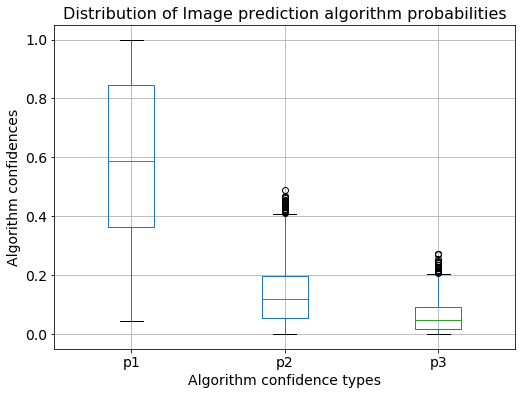

In [100]:
#Create combined box plot through merging of 3 dfs
DF = pd.concat([twitter_image_max,twitter_image_med,twitter_image_min])

ax=DF.boxplot(column='conf', by='conf_type', figsize=(8, 6), fontsize=14)
plt.suptitle("")
ax.set_xlabel("Algorithm confidence types",fontsize=14)
ax.set_ylabel("Algorithm confidences", fontsize=14)
ax.set_title('Distribution of Image prediction algorithm probabilities', fontsize=16);

## What is the Most/least retweeted dog according to image predictions?

In [101]:
#Create temporary df to perform operation by subseting dog True 
#and max retweet_count using defined image prediction algoritm
df1=twitter_image_max[(twitter_image_max['dog']== True)]
df1=df1[(df1['retweet_count'] == max(df1['retweet_count']))]   
#Tag each subseted value
df1['type']='p1_max'

In [102]:
#Create temporary df to perform operation by subseting dog True 
#and min retweet_count using defined image prediction algoritm
df2=twitter_image_max[(twitter_image_max['dog']== True)]
df2=df2[(df2['retweet_count'] == min(df2['retweet_count'])) ]
#Tag each subseted value
df2['type']='p1_min'

In [103]:
#Concat temporary dfs
DF = pd.concat([df1,df2])

In [104]:
#Create pivot table
pd.pivot_table(DF,index=["type","class"])['retweet_count']

type    class             
p1_max  labrador_retriever    77845
p1_min  english_setter           13
Name: retweet_count, dtype: int64

## What is the Most/Least favorited dog according to image predictions?

In [105]:
#Create temporary df to perform operation by subseting dog True 
#and max favorite_count using defined image prediction algoritm
df1=twitter_image_max[(twitter_image_max['dog']== True)]
df1=df1[(df1['favorite_count'] == max(df1['favorite_count']))]                   
#Tag each subseted value
df1['type']='p1_max'

In [106]:
#Create temporary df to perform operation by subseting dog True 
#and min favorite_count using defined image prediction algoritm
df2=twitter_image_max[(twitter_image_max['dog']== True)]
df2=df2[(df2['favorite_count'] == min(df2['favorite_count'])) ]
#Tag each subseted value
df2['type']='p1_min'

In [107]:
#Concat temporary dfs
DF = pd.concat([df1,df2])

In [108]:
#Create pivot table
pd.pivot_table(DF,index=["type","class"])['favorite_count']

type    class                    
p1_max  lakeland_terrier             144040.0
p1_min  afghan_hound                      0.0
        beagle                            0.0
        blenheim_spaniel                  0.0
        cardigan                          0.0
        chihuahua                         0.0
        chow                              0.0
        cocker_spaniel                    0.0
        dalmatian                         0.0
        english_setter                    0.0
        english_springer                  0.0
        golden_retriever                  0.0
        irish_setter                      0.0
        irish_terrier                     0.0
        labrador_retriever                0.0
        lakeland_terrier                  0.0
        malamute                          0.0
        miniature_pinscher                0.0
        norwegian_elkhound                0.0
        papillon                          0.0
        pug                               0.0


## What is the Most/Least real_rated dog according to image predictions?

In [109]:
#Create temporary df to perform operation by subseting dog True 
#and max real_rating using defined image prediction algoritm
df1=twitter_image_max[(twitter_image_max['dog']== True)]
df1=df1[(df1['real_rating'] == max(df1['real_rating']))] 
#Tag each subseted value
df1['type']='p1_max'

In [110]:
#Create temporary df to perform operation by subseting dog True 
#and min real_rating using defined image prediction algoritm
df2=twitter_image_max[(twitter_image_max['dog']== True)]
df2=df2[(df2['real_rating'] == min(df2['real_rating'])) ]
#Tag each subseted value
df2['type']='p1_min'

In [111]:
#Concat temporary dfs
DF = pd.concat([df1,df2])

In [112]:
#Create pivot table
pd.pivot_table(DF,index=["type","class"])['real_rating']

type    class      
p1_max  pomeranian     7.5
p1_min  great_dane     0.2
        maltese_dog    0.2
Name: real_rating, dtype: float64

## What is the time frame of retweets, i.e. which year the most of them were created? How many  tweets were received per month?

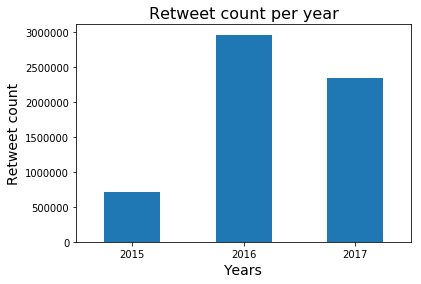

In [113]:
#Plot grouped by years cumulative retweet_counts
ax=twitter_image_max.groupby(twitter_image_max.timestamp.dt.year)['retweet_count'].sum().plot.bar(rot=0)
ax.set_xlabel("Years",fontsize=14)
ax.set_ylabel("Retweet count", fontsize=14)
ax.set_title('Retweet count per year', fontsize=16);

In [114]:
#Set timestamp as index to subset by month
df2=twitter_image_max.set_index(['timestamp']) 

In [115]:
#Subset sum retweet_count by year and month
df2 = df2.groupby([lambda x: x.year, lambda x: x.month])['retweet_count'].sum()

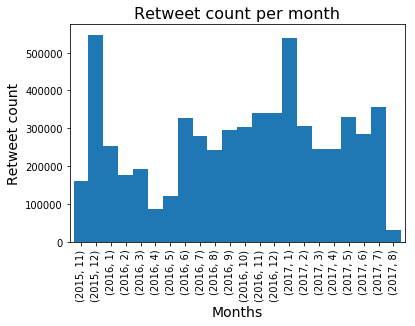

In [116]:
#Plot grouped by month cumulative retweet_counts
ax=df2.plot.bar(rot=90, width=1)
ax.set_xlabel("Months",fontsize=14)
ax.set_ylabel("Retweet count", fontsize=14)
ax.set_title('Retweet count per month', fontsize=16);

## What is the time frame of favorits, i.e. which year the most of them were created? How many  tweets were received per month?

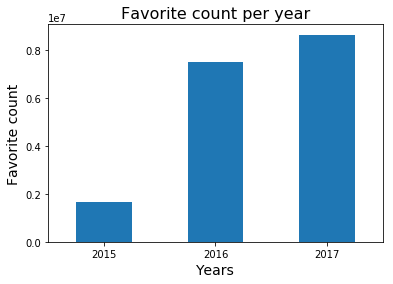

In [117]:
#Plot grouped by years cumulative favorite_count
ax=twitter_image_max.groupby(twitter_image_max.timestamp.dt.year)['favorite_count'].sum().plot.bar(rot=0)
ax.set_xlabel("Years",fontsize=14)
ax.set_ylabel("Favorite count", fontsize=14)
ax.set_title('Favorite count per year', fontsize=16);

In [118]:
#Set timestamp as index to subset by month
df2=twitter_image_max.set_index(['timestamp']) 

In [119]:
#Subset sum favorite_count by year and month
df2 = df2.groupby([lambda x: x.year, lambda x: x.month])['favorite_count'].sum()

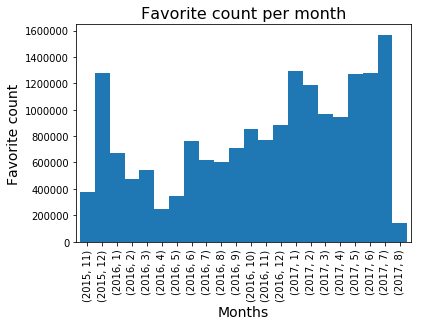

In [120]:
#Plot grouped by month cumulative favorite_count
ax=df2.plot.bar(rot=90, width=1)
ax.set_xlabel("Months",fontsize=14)
ax.set_ylabel("Favorite count", fontsize=14)
ax.set_title('Favorite count per month', fontsize=16);

In [121]:
### get number of dog types 
### test=image_predictions_long[image_predictions_long['dog']==True]
### test= test.drop_duplicates(subset='class', keep='first')
### test['class']

In [122]:
# set Buckets per year
# bins_dt = pd.date_range('2015-10-01', freq='12M', periods=3)
# bins_str = bins_dt.astype(str).values

# labels = ['({}, {}]'.format(bins_str[i-1], bins_str[i]) for i in range(1, len(bins_str))]

# twitter_archive_merged['year_bucket'] = pd.cut(twitter_archive_merged.timestamp.astype(np.int64)//10**9,
#                   bins=bins_dt.astype(np.int64)//10**9,
#                   labels=labels)

In [123]:
# set Buckets per month
# bins_dt = pd.date_range('2015-10-01', freq='1M', periods=23)
# bins_str = bins_dt.astype(str).values

# labels = ['({}, {}]'.format(bins_str[i-1], bins_str[i]) for i in range(1, len(bins_str))]

# twitter_archive_merged['month_bucket'] = pd.cut(twitter_archive_merged.timestamp.astype(np.int64)//10**9,
#                   bins=bins_dt.astype(np.int64)//10**9,
#                   labels=labels)

In [124]:
#Write twitter_archive_merged to csv as twitter_archive_master
twitter_archive_merged.to_csv('twitter_archive_master.csv')

In [125]:
#Write twitter_image_max to csv as twitter_image_max
twitter_image_max.to_csv('twitter_image_max.csv')

In [126]:
#Write twitter_image_med to csv as twitter_image_med
twitter_image_med.to_csv('twitter_image_med.csv')

In [127]:
#Write twitter_image_min to csv as twitter_image_min
twitter_image_min.to_csv('twitter_image_min.csv')

In [128]:
#Write image_predictions_long to csv as image_predictions_long
image_predictions_long.to_csv('image_predictions_long.csv')